In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import re
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\zqy\\Downloads\\feature_matrix_account (1).csv',dtype=object)
print(df.dtypes)
df = df[df['COUNT(trade)']!='0']
col = df.columns
print(df.shape)

交易卡号                                      object
交易账号                                      object
账户余额                                      object
可用余额                                      object
币种                                        object
                                           ...  
MODE(trade.YEAR(交易日期 + 交易时间))             object
NUM_UNIQUE(trade.DAY(交易日期 + 交易时间))        object
NUM_UNIQUE(trade.MONTH(交易日期 + 交易时间))      object
NUM_UNIQUE(trade.WEEKDAY(交易日期 + 交易时间))    object
NUM_UNIQUE(trade.YEAR(交易日期 + 交易时间))       object
Length: 102, dtype: object
(42, 102)


In [2]:
# 为k-means算法，挑出连续特征（参考https://primitives.featurelabs.com/#Week中，primitives描述中的Return Type，为<numeric>等）
numeric_col = []
primitives = ["sum", "std", "max", "skew", "min", "mean", "count","avg_time_between", "percent_true", "num_unique", "haversine", "num_words", "num_characters"]
for f in col:
#     if any([i.upper() in f for i in primitives]):
#         print(f)
    if any([f.startswith(i.upper()) for i in primitives]):
        print(f)
        numeric_col.append(f)
        
# 为k-modes算法，挑出类别特征

COUNT(trade)
MAX(trade.折人民币金额)
MEAN(trade.折人民币金额)
MIN(trade.折人民币金额)
NUM_UNIQUE(trade.IP所在地)
NUM_UNIQUE(trade.交易发生地)
NUM_UNIQUE(trade.交易对手客户名称)
NUM_UNIQUE(trade.交易对手客户账号)
NUM_UNIQUE(trade.交易对手对公对私标志)
NUM_UNIQUE(trade.交易对手开户机构行政区划)
NUM_UNIQUE(trade.交易对手本外行标识)
NUM_UNIQUE(trade.交易所在国家地区代码)
NUM_UNIQUE(trade.交易机构)
NUM_UNIQUE(trade.交易机构名称)
NUM_UNIQUE(trade.交易渠道种类描述)
NUM_UNIQUE(trade.交易种类)
NUM_UNIQUE(trade.借贷标志描述)
NUM_UNIQUE(trade.境内外标识)
NUM_UNIQUE(trade.备注1)
NUM_UNIQUE(trade.客户名称)
NUM_UNIQUE(trade.客户编号)
NUM_UNIQUE(trade.对公对私标志)
NUM_UNIQUE(trade.币种代码)
NUM_UNIQUE(trade.开户机构)
NUM_UNIQUE(trade.开户机构行政区划)
NUM_UNIQUE(trade.摘要描述)
NUM_UNIQUE(trade.是否异地交易(0否1是))
NUM_UNIQUE(trade.是否被代办(0否1是))
NUM_UNIQUE(trade.是否跨境交易)
NUM_UNIQUE(trade.是否跨行交易(0否1是))
NUM_UNIQUE(trade.结算类型现金转账消费)
NUM_UNIQUE(trade.账户类型)
NUM_UNIQUE(trade.资金用途)
SKEW(trade.折人民币金额)
STD(trade.折人民币金额)
SUM(trade.折人民币金额)
NUM_UNIQUE(trade.DAY(交易日期 + 交易时间))
NUM_UNIQUE(trade.MONTH(交易日期 + 交易时间))
NUM_UNIQUE(trade.WEEKDAY(交易日期 + 交易时间))
NUM_UNIQUE(trade.YE

,COUNT(trade),MAX(trade.折人民币金额),MEAN(trade.折人民币金额),MIN(trade.折人民币金额),NUM_UNIQUE(trade.IP所在地),NUM_UNIQUE(trade.交易发生地),NUM_UNIQUE(trade.交易对手客户名称),NUM_UNIQUE(trade.交易对手客户账号),NUM_UNIQUE(trade.交易对手对公对私标志),NUM_UNIQUE(trade.交易对手开户机构行政区划),...,NUM_UNIQUE(trade.结算类型现金转账消费),NUM_UNIQUE(trade.账户类型),NUM_UNIQUE(trade.资金用途),SKEW(trade.折人民币金额),STD(trade.折人民币金额),SUM(trade.折人民币金额),NUM_UNIQUE(trade.DAY(交易日期 + 交易时间)),NUM_UNIQUE(trade.MONTH(交易日期 + 交易时间)),NUM_UNIQUE(trade.WEEKDAY(交易日期 + 交易时间)),NUM_UNIQUE(trade.YEAR(交易日期 + 交易时间))
88,2,19.81,9.965,0.12,0,1,0,0,1,0,...,2,1,2,NaN,13.922932521563121,19.93,1,1,1,1
485,1431,50000.0,3256.578343815514,0.01,0,14,212,231,2,44,...,3,2,15,3.9902149790427335,7515.574917774881,4660163.61,20,2,7,2
609,4112,65891.0,874.7006128404669,0.01,1,15,2876,2808,2,10,...,3,1,20,7.223514914955789,4354.801578572618,3596768.92,31,12,7,2
838,488,100317.0,7158.3850204918035,0.01,2,11,201,167,2,22,...,3,1,14,3.2789884980001793,12544.047192755068,3493291.89,31,12,7,2
920,424,50000.0,6184.863490566038,0.01,0,29,313,351,2,75,...,2,2,13,2.553304836652889,10344.544764309056,2622382.12,7,2,7,1
1210,1362,46492.96,2573.117812041116,0.03,0,38,876,1222,2,233,...,1,1,8,3.6075656013406374,4881.352323045162,3504586.46,9,3,7,1
1218,772,751451.05,17620.849183937826,0.01,4,14,312,339,2,63,...,3,2,19,12.327582205825944,39450.37613797381,13603295.57,31,5,7,1
1330,3736,3000000.0,6123.057794432548,0.2,2,23,1428,663,2,107,...,3,1,33,38.17195668672984,59655.895527371606,22875743.919999998,31,12,7,2
1517,1360,250000.0,4189.659720588235,0.1,26,20,263,318,2,51,...,2,1,15,13.589930693186638,9496.821805157595,5697937.22,19,3,7,1
1534,3204,50000.0,4383.87138576779,0.01,4,30,729,890,2,118,...,3,1,16,2.8920362059617766,9566.34454120191,14045923.92,31,8,7,2


In [3]:
df_numeric = df.loc[:,numeric_col]
# df_numeric = df_numeric.applymap(lambda x:0 if x=='' else float(x))
df_numeric.fillna(0,inplace=True)

Stan_scaler = StandardScaler()
Stan_scaler.fit(df_numeric)
x_tf = Stan_scaler.transform(df_numeric)
x = pd.DataFrame(x_tf)
x

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-0.736754,-0.317773,-0.531578,-0.161785,-0.533530,-1.249496,-0.856553,-0.871287,-1.788854,-1.017765,...,-0.239904,-0.866025,-1.103614,-0.610054,-0.453779,-0.777291,-1.267731,-0.816861,-1.656201,-0.447214
1,-0.142076,-0.215950,-0.242416,-0.162453,-0.533530,-0.231250,-0.488591,-0.542955,0.559017,-0.453967,...,1.019592,1.154701,0.445417,0.041591,-0.150512,-0.240040,0.338062,-0.507779,0.675434,2.236068
2,0.973622,-0.183576,-0.454560,-0.162453,-0.471799,-0.152923,4.135231,3.119861,0.559017,-0.889629,...,1.019592,-0.866025,1.041199,0.569623,-0.278292,-0.362635,1.267731,2.583048,0.675434,2.236068
3,-0.534505,-0.113442,0.105101,-0.162453,-0.410068,-0.466230,-0.507683,-0.633922,0.559017,-0.735866,...,1.019592,-0.866025,0.326261,-0.074560,0.052773,-0.374565,1.267731,2.583048,0.675434,2.236068
4,-0.561138,-0.215950,0.018393,-0.162453,-0.533530,0.943649,-0.313288,-0.372393,0.559017,-0.056746,...,-0.239904,1.154701,0.207105,-0.193072,-0.036146,-0.474969,-0.760639,-0.507779,0.675434,-0.447214
5,-0.170790,-0.223095,-0.303289,-0.162332,-0.533530,1.648588,0.663893,0.865602,0.559017,1.967801,...,-1.499400,-0.866025,-0.388676,-0.020900,-0.257005,-0.373263,-0.591608,-0.198696,0.675434,-0.447214
6,-0.416318,1.213086,1.036948,-0.162453,-0.286607,-0.231250,-0.315024,-0.389450,0.559017,-0.210509,...,1.019592,1.154701,0.922042,1.403172,1.140509,0.790979,1.267731,0.419469,0.675434,-0.447214
7,0.817150,5.793958,0.012889,-0.161299,-0.410068,0.473689,1.621982,0.071067,0.559017,0.353289,...,1.019592,-0.866025,2.590230,5.623834,1.957353,1.859965,1.267731,2.583048,0.675434,2.236068
8,-0.171622,0.191501,-0.159311,-0.161906,1.071469,0.238710,-0.400072,-0.419298,0.559017,-0.364272,...,-0.239904,-0.866025,0.445417,1.609327,-0.070416,-0.120400,0.253546,-0.198696,0.675434,-0.447214
9,0.595758,-0.215950,-0.142013,-0.162453,-0.286607,1.021976,0.408750,0.393714,0.559017,0.494238,...,1.019592,-0.866025,0.564574,-0.137754,-0.067606,0.842008,1.267731,1.346717,0.675434,2.236068


[1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 1]
[0 2 2 2 2 2 2 1 2 2 0 0 2 2 1 0 2 2 2 0 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 2 0
 0 2 0 2 0]
[1 0 3 0 0 0 0 2 0 0 1 0 0 0 2 1 0 0 3 1 3 1 3 0 0 1 0 1 0 3 1 3 0 3 3 3 1
 1 0 1 0 1]
[2 4 0 4 4 1 4 0 4 1 2 4 4 4 3 2 4 1 1 2 1 2 1 4 4 2 1 2 4 1 2 1 4 1 1 1 2
 2 4 2 4 2]


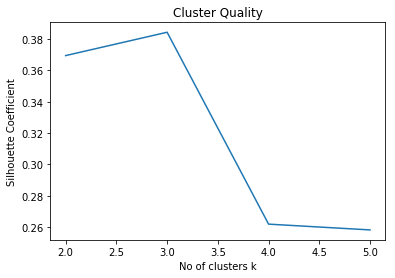

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def form_clusters(x,k):
    # k 是划分出的簇的个数
    no_clusters = k
    model = KMeans(n_clusters= no_clusters, init='random')
    model.fit(x)
    labels = model.labels_
    print(labels)
    #计算轮廓系数
    sh_score= silhouette_score(x,labels)
    return sh_score

#k=2,3,4,5都挨个试下，然后得到其轮廓系数，用以评分
#轮廓系数的值介于-1到1之间，越接近1表明聚类效果好
sh_scores = []
for i in range(1,5):
    sh_score = form_clusters(x,i+1)
    sh_scores.append(sh_score)
no_clusters = [i+1 for i in range(1,5)]
plt.figure(2)
plt.plot(no_clusters,sh_scores)
plt.title('Cluster Quality')
plt.xlabel('No of clusters k')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [11]:
#
model = KMeans(n_clusters=3 , init='random')
model.fit(x)
labels = model.labels_
print(labels)
df_numeric = df.loc[:,numeric_col]
df_numeric.insert(0, '标签', labels)
df_numeric.insert(1, '交易卡号', df['交易卡号'])

print(df_numeric)
df_numeric.to_excel('C:\\Users\\zqy\\Desktop\\featuretools+k-mean.xlsx',index = None)
print('Done!')


[0 2 2 2 2 2 2 1 2 2 0 2 2 2 1 0 2 2 2 0 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 2 0
 0 2 0 2 0]
      标签                 交易卡号 COUNT(trade) MAX(trade.折人民币金额)  \
88     0  1375359980110186776            2             19.81   
485    2  6217001250022402146         1431           50000.0   
609    2  6217001370028257490         4112           65891.0   
838    2  6236681370002802284          488          100317.0   
920    2  6217001320012158618          424           50000.0   
1210   2  6236681330001221878         1362          46492.96   
1218   2  6215340302604364824          772         751451.05   
1330   1  6217001240012376186         3736         3000000.0   
1517   2  6217001310013360981         1360          250000.0   
1534   2  6217001330014668167         3204           50000.0   
1541   0  6217001290006936891            2             10.54   
1899   2  6217001370048701212           14              30.0   
1901   2  6236681320004545804          758           49900.0   
1906   2  6217001

Done!


交易卡号                                      object
交易账号                                      object
账户开户名称                                    object
AVG_TIME_BETWEEN(trade.交易日期 + 交易时间)       object
COUNT(trade)                              object
                                           ...  
MODE(trade.YEAR(交易日期 + 交易时间))             object
NUM_UNIQUE(trade.DAY(交易日期 + 交易时间))        object
NUM_UNIQUE(trade.MONTH(交易日期 + 交易时间))      object
NUM_UNIQUE(trade.WEEKDAY(交易日期 + 交易时间))    object
NUM_UNIQUE(trade.YEAR(交易日期 + 交易时间))       object
Length: 73, dtype: object
(633, 73)
AVG_TIME_BETWEEN(trade.交易日期 + 交易时间)
COUNT(trade)
MAX(trade.折人民币金额)
MEAN(trade.折人民币金额)
MIN(trade.折人民币金额)
NUM_UNIQUE(trade.交易发生地)
NUM_UNIQUE(trade.交易对手客户名称)
NUM_UNIQUE(trade.交易对手客户账号)
NUM_UNIQUE(trade.交易对手对公对私标志)
NUM_UNIQUE(trade.交易对手开户机构)
NUM_UNIQUE(trade.交易对手开户机构行政区划)
NUM_UNIQUE(trade.交易对手本外行标识)
NUM_UNIQUE(trade.交易所在国家地区代码)
NUM_UNIQUE(trade.交易机构)
NUM_UNIQUE(trade.交易机构名称)
NUM_UNIQUE(trade.交易渠道种类描述)
NUM_UNIQUE(trade.交易种类)
N

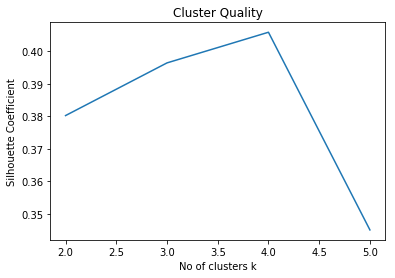

In [3]:
import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import time
import re
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\zqy\Desktop\Project\evolutionary_forest\feature_matrix_account_trade.csv',dtype=object)
print(df.dtypes)
# df = df[df['COUNT(trade)']!='0']
df = df.sort_values(['交易账号','COUNT(trade)'], ascending=[True,True]).drop_duplicates(subset='交易账号',keep='last').reset_index().iloc[:,1:]
col = df.columns
print(df.shape)
df.to_csv('C:\Users\zqy\Desktop\Project\evolutionary_forest\matrix一户保留一卡.csv',index = None)


# 为k-means算法，挑出连续特征（参考https://primitives.featurelabs.com/#Week中，primitives描述中的Return Type，为<numeric>等）
numeric_col = []
primitives = ["sum", "std", "max", "skew", "min", "mean", "count","avg_time_between", "percent_true", "num_unique", "haversine", "num_words", "num_characters"]
for f in col:
#     if any([i.upper() in f for i in primitives]):
#         print(f)
    if any([f.startswith(i.upper()) for i in primitives]):
        print(f)
        numeric_col.append(f)
        
# 

df_numeric = df.loc[:,numeric_col]
# df_numeric = df_numeric.applymap(lambda x:0 if x=='' else float(x))
df_numeric.fillna(0,inplace=True)

Stan_scaler = StandardScaler()
Stan_scaler.fit(df_numeric)
x_tf = Stan_scaler.transform(df_numeric)
x = pd.DataFrame(x_tf)
pprint.pprint(x)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def form_clusters(x,k):
    # k 是划分出的簇的个数
    no_clusters = k
    model = KMeans(n_clusters= no_clusters, init='random')
    model.fit(x)
    labels = model.labels_
    print(labels)
    #计算轮廓系数
    sh_score= silhouette_score(x,labels)
    return sh_score

#k=2,3,4,5都挨个试下，然后得到其轮廓系数，用以评分
#轮廓系数的值介于-1到1之间，越接近1表明聚类效果好
sh_scores = []
for i in range(1,5):
    sh_score = form_clusters(x,i+1)
    sh_scores.append(sh_score)
no_clusters = [i+1 for i in range(1,5)]
plt.figure(2)
plt.plot(no_clusters,sh_scores)
plt.title('Cluster Quality')
plt.xlabel('No of clusters k')
plt.ylabel('Silhouette Coefficient')
plt.show()



In [5]:
model = KMeans(n_clusters=4 , init='random')
model.fit(x)
labels = model.labels_
print(labels)
df_numeric = df.loc[:,numeric_col]
df_numeric.insert(0, '标签', labels)
df_numeric.insert(1, '交易卡号', df['交易卡号'])
df_numeric.insert(2, '交易账号', df['交易账号'])
df_numeric.insert(3, '账户开户名称', df['账户开户名称'])
print(df_numeric)
df_numeric.to_excel('C:\\Users\\zqy\\Desktop\\featuretools+k-mean_0425.xlsx',index = None)
print('Done!')

[3 3 2 1 1 0 1 3 2 1 1 2 1 3 1 3 3 3 1 1 1 3 1 2 1 1 1 1 3 3 2 2 3 2 3 1 1
 1 1 1 2 1 1 1 2 2 1 1 2 3 3 3 2 2 2 3 1 2 2 3 1 1 3 2 1 3 1 2 3 2 2 3 3 3
 1 1 1 3 1 3 1 3 2 2 2 1 3 1 2 3 2 1 3 3 1 3 1 2 3 3 1 1 1 1 3 2 2 1 1 1 2
 3 3 1 2 1 3 1 1 1 3 1 1 3 1 3 1 2 3 3 1 3 3 2 3 1 1 2 2 1 1 1 1 1 3 1 3 2
 2 2 2 2 1 3 3 1 1 3 1 3 3 2 1 1 2 3 1 2 2 3 2 2 3 2 2 2 3 3 2 1 1 1 1 2 2
 1 3 1 3 2 2 3 1 1 1 3 2 3 1 3 0 3 1 1 3 3 3 1 1 1 0 3 2 3 3 2 1 1 1 1 2 3
 1 2 1 3 1 2 2 1 3 2 3 1 3 3 2 1 3 2 3 3 1 1 3 2 1 3 1 3 3 1 2 2 1 3 2 2 3
 1 2 2 2 1 1 1 3 1 3 3 2 2 1 3 2 1 3 1 2 2 3 3 1 3 1 2 1 0 3 1 2 1 2 1 2 3
 2 1 3 2 1 1 1 3 1 2 1 2 1 3 1 1 2 3 2 3 1 1 1 1 3 3 3 2 3 2 3 1 3 3 3 3 1
 1 3 3 2 3 3 3 3 3 3 3 1 2 2 1 3 1 1 1 3 3 1 2 3 3 3 3 1 1 3 3 3 2 3 3 3 3
 2 1 1 2 3 2 2 2 3 2 1 2 2 2 1 3 3 2 1 2 2 3 3 1 3 1 3 3 1 1 1 2 3 1 1 3 3
 1 2 2 3 2 3 3 2 1 3 3 3 2 1 2 3 3 3 2 1 3 1 1 3 3 1 2 2 2 2 1 1 3 2 2 1 3
 3 2 1 2 3 1 1 1 3 1 1 3 1 1 1 1 1 2 3 3 1 1 1 3 1 1 2 1 1 1 2 3 1 1 1 2 3
 1 3 1 3 2 3 2 1 1 1 1 1 